Проект: Статистический анализ данных
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

Без подписки абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

С подпиской Ultra абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

In [1]:
import pandas as pd
import scipy 
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#импортирование нужных библиотек отдельно от задания

#### Шаг 1. Загрузка данных

In [2]:
user = pd.read_csv('/datasets/users_go.csv')
ride = pd.read_csv('/datasets/rides_go.csv')
sub = pd.read_csv('/datasets/subscriptions_go.csv')

Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — users_go.csv
user_id	уникальный идентификатор пользователя
name	имя пользователя
age	возраст
city	город
subscription_type	тип подписки (free, ultra)

Поездки — rides_go.csv
user_id	уникальный идентификатор пользователя
distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date	дата совершения поездки

Подписки — subscriptions_go.csv
subscription_type	тип подписки
minute_price	стоимость одной минуты поездки по данной подписке
start_ride_price	стоимость начала поездки
subscription_fee	стоимость ежемесячного платежа

Ознакомление с данными было произведено ниже:
Было установлены первые предположения о данных, при помощи выборке первых 10 строк данных.
Установлен тип данных, и общий размер датафрэйма

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
5        6      Регина   25       Краснодар             ultra
6        7       Игорь   23            Омск             ultra
7        8        Юрий   23       Краснодар             ultra
8        9          Ян   21       Пятигорск             ultra
9       10     Валерий   18    Екатеринбург             ultra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

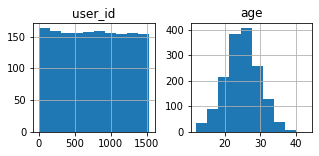

In [3]:
print(user.head(10))
user.info()
user.hist(figsize=(5, 2))

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
5        1  2770.890808  16.650138  2021-10-09
6        1  3039.020292  14.927879  2021-10-19
7        1  2842.118050  23.117468  2021-11-06
8        1  3412.690668  15.238072  2021-11-14
9        1   748.690645  15.041884  2021-11-22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

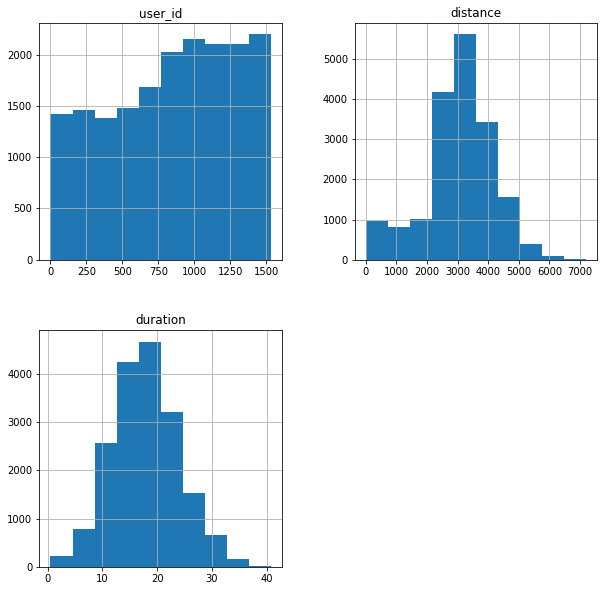

In [4]:
print(ride.head(10))
ride.info()
ride.hist(figsize=(10, 10))

In [5]:
print(sub.head(10))
sub.info()
sub

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

In [6]:
#предобработкa данных
ride['date'] = pd.to_datetime(ride['date'], format='%Y.%m.%dT%H:%M:%S')
ride['month'] = ride['date'].dt.month

Отфармотировали столбец date, сделали новый столбец со значением месяц

In [7]:
user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Проверили наличие пропущенных значений в датафрэйме user.

In [8]:
ride.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Проверили наличие пропущенных значений в датафрэйме ride.

In [9]:
sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверили наличие пропущенных значений в датафрэйме sub.

In [10]:
user.duplicated().sum()
user.drop_duplicates(inplace=True)
user.duplicated().sum()

0

***Проверили наличие дупликатов в датафрэйме user. Их 31. Удалим эти строки из датафрэйма***

In [11]:
ride.duplicated().sum()

0

Проверили наличие дупликатов в датафрэйме ride. Их 0

In [12]:
sub.duplicated().sum()

0

Проверили наличие дупликатов в датафрэйме sub. Их 0

#### Шаг 3. Исследовательский анализ данных

***Частота встречаемости городов***

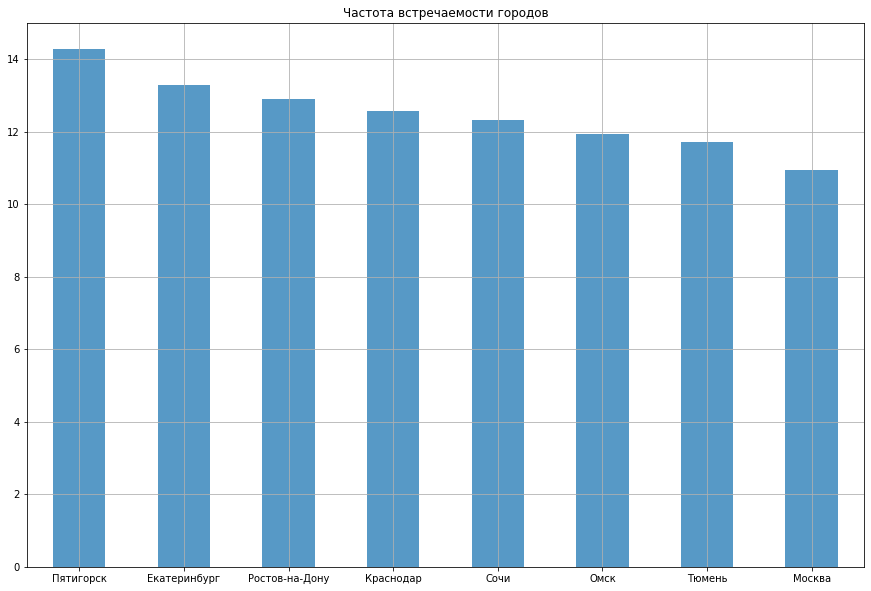

In [13]:
count = user['city'].value_counts() 
summ = count.sum()
res = round((count / summ)*100, 2)
res.plot(kind = 'bar',y = res, grid=True, figsize=(15, 10), title = 'Частота встречаемости городов',alpha=0.75, rot=0)
plt.ylabel('')
plt.show()

***Соотношение пользователей с подпиской и без подписки***

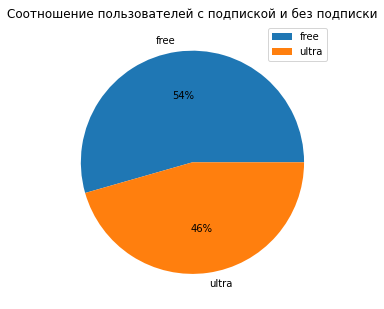

In [14]:
counting = user['subscription_type'].value_counts()
user['subscription_type'].value_counts().plot(kind = 'pie', y = counting, autopct = '%1.0f%%',
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()
counting = user['subscription_type'].value_counts()


***Возраст пользователей***

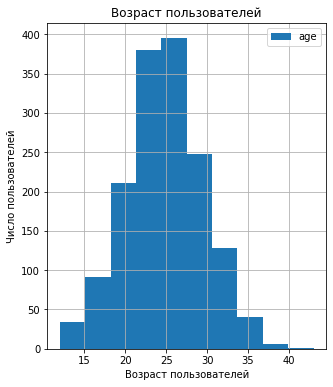

In [15]:
user['age'].sort_values().plot(kind = 'hist', bins =10,
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Возраст пользователей')
plt.xlabel('Возраст пользователей')
plt.ylabel('Число пользователей')
plt.show()

***Расстояние, которое пользователь преодолел за одну поездку***

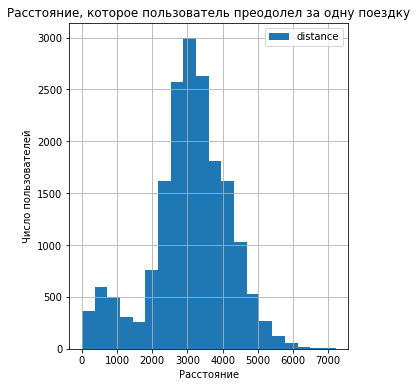

In [16]:
ride['distance'].sort_values().plot(kind = 'hist', bins =20,
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Число пользователей')
plt.show()

***Продолжительность поездок*** 

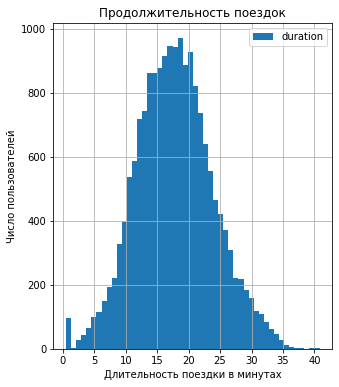

In [17]:
ride['duration'].sort_values().plot(kind = 'hist', bins =50,
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Продолжительность поездок')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Число пользователей')
plt.show()

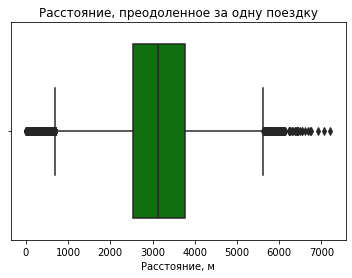

In [18]:
sns.boxplot(x=ride['distance'], color='green')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.show()

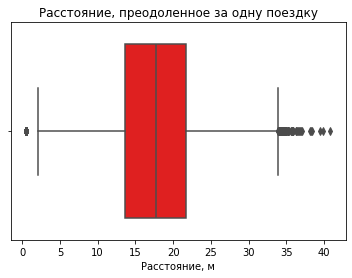

In [19]:
sns.boxplot(x=ride['duration'], color='red')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.show()

***ИТОГ***

Частота появления городов:

Распределение пользователей по городам примерно одинаково, без ярко выраженных аномалий. Наибольшее число пользователей зарегистрировано в Пятигорске - 219 человек, в то время как в Москве этот показатель составляет 168 человек. Вероятно, это объясняется тем, что Пятигорск значительно меньше Москвы по размеру, делая его более удобным для использования самоката как средства передвижения.

Соотношение пользователей с и без подписки:
Бесплатную подписку используют 835 пользователей, что составляет примерно 54% от общего числа. В то время как 699 пользователей пользуются платной подпиской, что составляет примерно 46%.
Возраст пользователей:

Самые молодые пользователи имеют возраст 12 и 13 лет, в то время как самые старшие - 43 и 39 лет. В целом, пользователи приложения в основном находятся в возрастном диапазоне от 20 до 30 лет.
Расстояние преодоленное пользователем за одну поездку:

Самая короткая дистанция, пройденная пользователем, составляет 0.86 км, а самая длинная - 7.2 км. Большинство пользователей проезжают от 2.5 до 4 км.
Продолжительность поездок:

Самые короткие поездки длились всего полминуты, что выглядит необычно, возможно, пользователи отменили поездку или столкнулись с техническими проблемами самоката. Самая долгая поездка заняла 40 минут. В среднем, поездки длительностью от 13 до 22 минут являются наиболее типичными.

#### Шаг 4. Объединение данных

***Создание новых датафреймов из полного по признаку наличия подписки***

data_full - полный датафрейм

data_full_sub - полный датафрейм для пользователей с подпиской

data_full_no_sub - полный датафрейм для пользователей с бесплатной подпиской

In [20]:
data_full = user.merge(ride)
data_full = data_full.merge(sub)
data_full_sub = data_full.query('subscription_type == "ultra"')
data_full_no_sub = data_full.query('subscription_type == "free"')
print(data_full_sub)
data_full_no_sub

      user_id    name  age    city subscription_type     distance   duration  \
0           1    Кира   22  Тюмень             ultra  4409.919140  25.599769   
1           1    Кира   22  Тюмень             ultra  2617.592153  15.816871   
2           1    Кира   22  Тюмень             ultra   754.159807   6.232113   
3           1    Кира   22  Тюмень             ultra  2694.783254  18.511000   
4           1    Кира   22  Тюмень             ultra  4028.687306  26.265803   
...       ...     ...  ...     ...               ...          ...        ...   
6495      699  Оксана   22  Москва             ultra  3973.046497  24.671163   
6496      699  Оксана   22  Москва             ultra  3288.702563  15.892886   
6497      699  Оксана   22  Москва             ultra  3076.159348  14.389525   
6498      699  Оксана   22  Москва             ultra  4707.845501  15.839579   
6499      699  Оксана   22  Москва             ultra  3202.890770  25.217345   

           date  month  minute_price  s

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Для более удобного чтения, обозначим диаграммы для клиентов с подпиской "зеленым", а без подписки "красным"

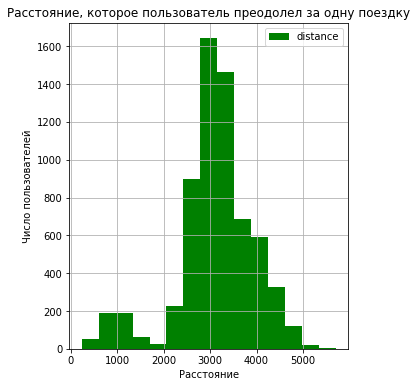

In [21]:
data_full_sub['distance'].sort_values().plot(kind = 'hist', bins = 15, color = 'green',
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Число пользователей')
plt.show()

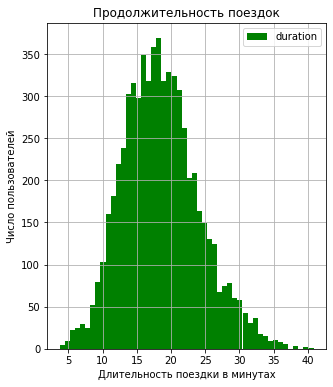

In [22]:
data_full_sub['duration'].sort_values().plot(kind = 'hist', bins =50, color = 'green',
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Продолжительность поездок')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Число пользователей')
plt.show()

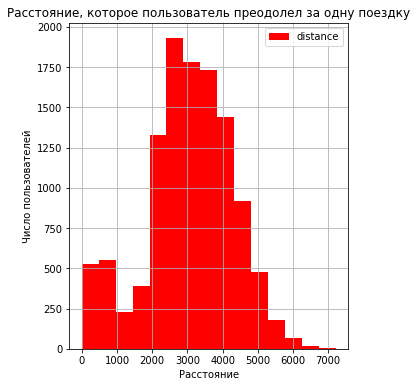

In [23]:
data_full_no_sub['distance'].sort_values().plot(kind = 'hist', bins =15, color = 'red',
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Число пользователей')
plt.show()

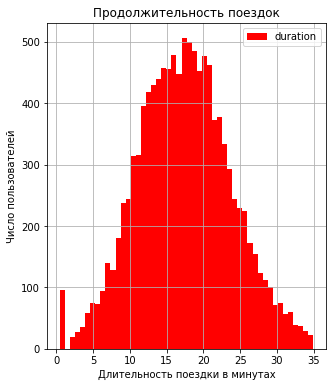

In [24]:
data_full_no_sub['duration'].sort_values().plot(kind = 'hist', bins =50, color = 'red',
                                              grid=True, 
                                              legend=True, 
                                              figsize=(5, 6), 
                                              title = 'Продолжительность поездок')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Число пользователей')
plt.show()

***Вывод***

Мы визуализировали данные о расстоянии и времени для каждого из тарифов.

Для пользователей с бесплатным тарифом, время поездки обычно составляет от 10 до 30 минут, и пройденное расстояние варьируется от 2 до 5 км, с некоторыми случаями, когда пользователи проехали даже 6 или 6.5 км.

В случае платного тарифа, в основном время поездки сосредоточено в диапазоне от 15 до 25 минут, а наиболее часто преодолеваемое расстояние составляет 3 км.

Таким образом, можно заключить, что пользователи с бесплатным тарифом, в среднем, предпочитают более длительные поездки и проезжают большее расстояние по сравнению с пользователями, выбравшими платный тариф.

#### Шаг 5. Подсчёт выручки

In [25]:
#округлим длительность поездок
data_full['duration'] = np.ceil(data_full['duration'])
#создали агрегированный датафрэйм
agr_data = pd.pivot_table(data_full,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})
#создадим функцию для расчета прибыли согласно условию задания и добавим новый столбец в датафрэйм
def profit(row):
    if row['subscription_type'] == 'ultra':
        return row['duration']*sub.loc[1,'minute_price'] + sub.loc[1,'subscription_fee']
    elif row['subscription_type'] == 'free':
        return row['duration']*sub.loc[0,'minute_price'] + row['name']*sub.loc[0,'start_ride_price']
    else:
        return 'Люблю Яндекс'
agr_data['profit_per_month'] = agr_data.apply(profit, axis=1)
agr_data

distance  duration  name subscription_type  profit_per_month
month user_id                                                                 
1     1        7027.511294      42.0     2             ultra             451.0
      3        3061.777147      13.0     1             ultra             277.0
      5        3914.646990      13.0     1             ultra             277.0
      7        6478.080979      28.0     2             ultra             367.0
      12       3577.151148      33.0     1             ultra             397.0
...                    ...       ...   ...               ...               ...
12    1525     4597.854350      34.0     1              free             322.0
      1526     3644.121544      23.0     1              free             234.0
      1528     3998.569324      11.0     1              free             138.0
      1532     6111.889853      42.0     2              free             436.0
      1534     2371.711192      16.0     1              free             178.0

[11331 rows x 5 columns]

Мы вычислили общее пройденное расстояние, количество совершенных поездок и общее время поездок для каждого пользователя за каждый месяц. Также мы добавили столбец с месячным доходом, полученным от каждого пользователя.

#### Шаг 6. Проверка гипотез

Проведем исследование, чтобы выяснить, потратят ли пользователи с подпиской больше времени на поездки по сравнению с пользователями, использующими бесплатный тариф.

Гипотеза H_0: Среднее время поездок пользователей с подпиской Ultra равно среднему времени поездок пользователей с бесплатным тарифом.

Гипотеза H_1: Среднее время поездок пользователей с подпиской Ultra больше среднего времени поездок пользователей с бесплатным тарифом.

In [26]:
sub = data_full_sub['duration'] 

nosub = data_full_no_sub['duration']

results = st.ttest_ind(sub, 
                       nosub,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Проведенное исследование опровергло предположение о том, что время поездок пользователей, имеющих тариф Ultra, совпадает с временем поездок пользователей с бесплатным тарифом.

Давайте проверим следующее предположение: пользователи с подпиской проезжают расстояние, которое не превышает 3130 метров за одну поездку.

Гипотеза H_0: Среднее расстояние поездок пользователей с подпиской Ultra равно 3130 метрам.

Гипотеза H_1: Среднее расстояние поездок пользователей с подпиской Ultra больше, чем 3130 метров.

In [27]:
sub_dist = data_full_sub['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(
    sub_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Результаты проверки гипотезы не позволяют нам сделать вывод о том, что расстояние, пройденное пользователями с тарифом Ultra, не превышает 3130 метров.

Исследуем следующее предположение: месячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.

Гипотеза H_0: Средняя помесячная выручка пользователей с подпиской Ultra равна средней помесячной выручке пользователей с бесплатной подпиской.

Гипотеза H_1: Средняя помесячная выручка пользователей с подпиской Ultra превышает среднюю помесячную выручку пользователей с бесплатной подпиской.

In [28]:
sub_per_month = agr_data.loc[agr_data['subscription_type'] == "ultra", 'profit_per_month']
free_sub_per_month = agr_data.loc[agr_data['subscription_type'] == "free", 'profit_per_month'] 


results = st.ttest_ind(sub_per_month, 
                       free_sub_per_month,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проведя проверку гипотезы, мы можем заключить, что выручка от пользователей с подпиской Ultra превышает выручку от пользователей с бесплатной подпиской.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Мы предполагаем использовать гипотезу о равенстве средних для связанных (парных) выборок. Это означает, что мы сравниваем средние значения двух связанных групп данных.

Формулировка гипотез:

H0: Среднее количество обращений в техподдержку до и после изменения одинаково.

H1: Среднее количество обращений в техподдержку до и после изменения уменьшилось.

Здесь μ1 и μ2 представляют собой средние значения количества обращений в техподдержку до и после изменений соответственно.

Если списки уникальных пользователей в них совпадают, то выборки зависимы . Для проверки гипотез мы намерены использовать метод scipy.stats.ttest_rel(after, before, alternative=’less’), который позволяет нам сравнить средние значения двух связанных выборок и оценить, является ли различие между ними статистически значимым.

***Общий вывод***

Все первоначальные данные во всех файлах были изначально чистыми: в них отсутствовали пропуски, значительные выбросы и дубликаты, за исключением тех, которые были обнаружены в файле 'users_go.csv'. При копировании данных из файлов в датафреймы столбцы данных не находились в оптимальном состоянии. В ходе предварительной обработки данных они были оптимизированы для целей данного проекта.

Во время анализа данных были обнаружены следующие ключевые моменты:

Всего 835 пользователей пользуются подпиской "free", что составляет 54.43% от общего числа пользователей, превышая число пользователей с подпиской "ultra" на 136.
Пользователи разного возраста, от 12 до 43 лет, пользуются услугами аренды самокатов. Максимальное количество пользователей приходится на возраст 25 лет, который также является медианным.
Большинство пользователей используют подписку "free", их количество составляет 835, что составляет 54.43% от общего числа пользователей и на 136 больше, чем пользователей с подпиской "ultra".
Максимальное количество поездок (219) было совершено в городе Пятигорске, а минимальное (168) - в Москве.
Дистанция поездок варьируется от 1 до 7211 метров. Медианное значение составляет 3134 метра. Наблюдаются два пика: небольшой около 700 метров и основной около 3200 метров, с нормальным распределением между ними.
Продолжительность поездок нормально распределена от 0 до 41 минуты, с наиболее частым значением в 18 минут. Наблюдается выброс менее чем в 100 случаях с продолжительностью 1 минута.
В результате группировки данных выявлено следующее:

Количество поездок с использованием подписки "free" на 5068 больше, чем с использованием подписки "ultra", и составляет 11568.
Возрастные показатели пользователей с разными типами подписок в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской "free".
Дистанция поездок при использовании подписки "free" более разнообразна, с большими максимальными и минимальными значениями, и большим стандартным отклонением, чем при использовании подписки "ultra". Средняя дистанция при использовании подписки "free" короче.
Продолжительность поездок при использовании подписки "free" немного меньше по всем показателям, чем при использовании подписки "ultra".
Также была выявлена сезонность использования разных типов подписок, с выраженными пиками активности в разные периоды года в зависимости от типа подписки. Все города показали предпочтение к подписке "free", хотя Пятигорск и Ростов-на-Дону выделяются как лидеры по использованию разных типов подписок.
Проведенные исследования гипотез привели к следующим результатам:

Отвергнута гипотеза о том, что пользователи с подпиской тратят больше времени на поездки по сравнению с пользователями, пользующимися бесплатным тарифом.
Гипотеза о том, что пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку, не была отвергнута.
Отвергнута гипотеза о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.